In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense
import tensorflow as tf 

In [2]:
# Load the dataset
df = pd.read_csv('AAPL.csv')
print('Initial dataset:')
print(df.head())

Initial dataset:
         Date      Open      High       Low     Close  Adj Close     Volume
0  1980/12/12  0.128348  0.128906  0.128348  0.128348   0.099319  469033600
1  1980/12/15  0.122210  0.122210  0.121652  0.121652   0.094137  175884800
2  1980/12/16  0.113281  0.113281  0.112723  0.112723   0.087228  105728000
3  1980/12/17  0.115513  0.116071  0.115513  0.115513   0.089387   86441600
4  1980/12/18  0.118862  0.119420  0.118862  0.118862   0.091978   73449600


In [3]:
# Check for duplicates
duplicate_dates = df[df.duplicated(subset='Date')]
print("Duplicate Dates:")
print(duplicate_dates)

Duplicate Dates:
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume]
Index: []


In [4]:
# Check for missing values
print('Checking for missing values')
print(df.isnull().sum())

Checking for missing values
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [5]:
# Convert 'Date' column to datetime format and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Extract the 'Close' column for further analysis
closing_prices = df.filter(['Close']).values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(closing_prices)

In [6]:
# Create training dataset
train_data = scaled_prices[:int(len(scaled_prices) * 0.95), :]
x_train, y_train = [], []

In [7]:
# Prepare training data
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
# Create and train the SVM model
# svm_model = SVR(kernel='rbf', C=100)
svm_model = SVR(kernel='sigmoid', C=100, gamma=.0073)
svm_model.fit(x_train, y_train)

SVR(C=100, gamma=0.0073, kernel='sigmoid')

In [9]:
# Create testing dataset
test_data = scaled_prices[int(len(scaled_prices) * 0.95) - 60:, :]
x_test, y_test = [], closing_prices[int(len(closing_prices) * 0.95):, :]

# Prepare testing data
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)

In [10]:
# Get the models predicted price values
predictions = svm_model.predict(x_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1)).flatten()

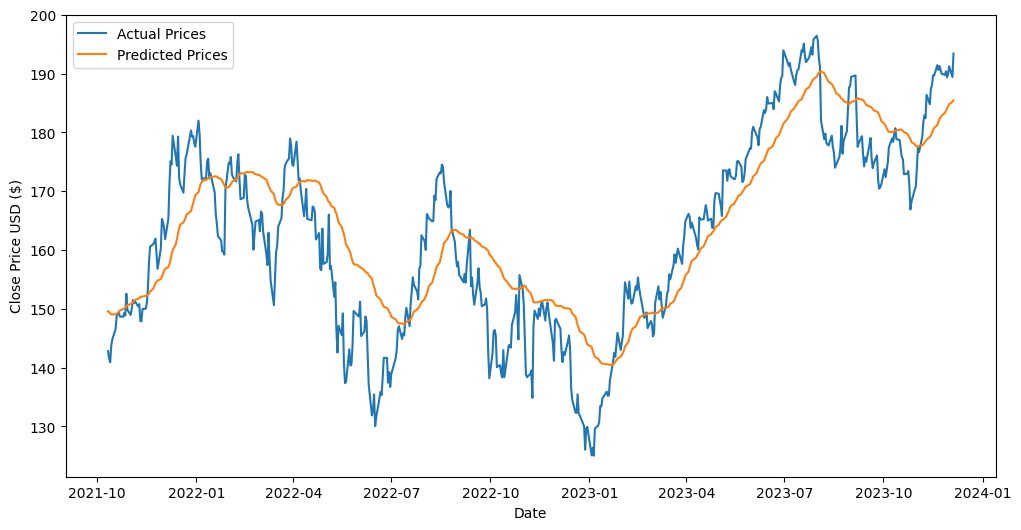

In [16]:
# Visualize the predicted prices compared to actual prices
plt.figure(figsize=(12, 6))
# plt.title('Stock Price Prediction using SVM')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(df.index[-len(y_test):], y_test, label='Actual Prices')
plt.plot(df.index[-len(y_test):], predictions, label='Predicted Prices')
plt.legend()
plt.savefig('Stock Price Prediction using SVM')
plt.show()

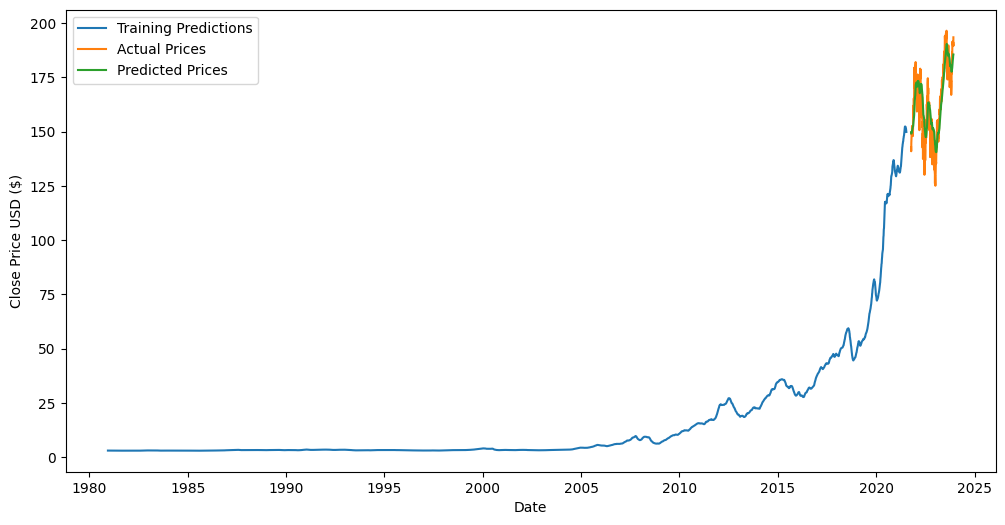

In [15]:
# Get the predictions for the training data
train_predictions = svm_model.predict(x_train)
train_predictions = scaler.inverse_transform(train_predictions.reshape(-1,1)).flatten()

# Plotting
plt.figure(figsize=(12, 6))
# plt.title('Stock Price Prediction using SVM')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')

plt.plot(df.index[:len(train_predictions)], train_predictions, label='Training Predictions')
plt.plot(df.index[-len(y_test):], y_test, label='Actual Prices')
plt.plot(df.index[-len(y_test):], predictions, label='Predicted Prices')
plt.legend()
plt.savefig('Stock Price Trend using SVM')
plt.show()

In [17]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('SVM Model Evaluation:')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2 Score: {r2:.2f}')

SVM Model Evaluation:
MSE: 76.97
RMSE: 8.77
MAE: 7.26
R2 Score: 0.72
